# Simple Linear Regression and Multiple Regression

## Load Data

In [36]:
sco <- read.csv("./Data/scoreIQ.txt")
sco

Student,Score,IQ,PrivateInstitutes,Gameplay,TV
<fct>,<int>,<int>,<int>,<int>,<int>
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0


In [37]:
summary(sco)

    Student      Score            IQ        PrivateInstitutes    Gameplay  
 A      :1   Min.   :65.0   Min.   :105.0   Min.   :0.00      Min.   :0.0  
 B      :1   1st Qu.:75.5   1st Qu.:120.8   1st Qu.:1.00      1st Qu.:1.0  
 C      :1   Median :79.5   Median :126.5   Median :2.00      Median :1.5  
 D      :1   Mean   :78.9   Mean   :125.4   Mean   :1.90      Mean   :1.9  
 E      :1   3rd Qu.:83.0   3rd Qu.:131.8   3rd Qu.:2.75      3rd Qu.:3.0  
 F      :1   Max.   :90.0   Max.   :140.0   Max.   :4.00      Max.   :4.0  
 (Other):4                                                                 
       TV     
 Min.   :0.0  
 1st Qu.:1.0  
 Median :2.5  
 Mean   :2.1  
 3rd Qu.:3.0  
 Max.   :4.0  
              

In [38]:
str(sco)

'data.frame':	10 obs. of  6 variables:
 $ Student          : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ Score            : int  90 75 77 83 65 80 83 70 87 79
 $ IQ               : int  140 125 120 135 105 123 132 115 128 131
 $ PrivateInstitutes: int  2 1 1 2 0 3 3 1 4 2
 $ Gameplay         : int  1 3 0 3 4 1 4 1 0 2
 $ TV               : int  0 3 4 2 4 1 1 3 0 3


## Find correlation coefficients

In [39]:
cor(sco[-1]) 


,Score,IQ,PrivateInstitutes,Gameplay,TV
Score,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
PrivateInstitutes,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
Gameplay,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


## Simple Linear Regression
     
     As IQ shows the strongest correlations to Score, let's have a simple linear regresson model with IQ to predict score.

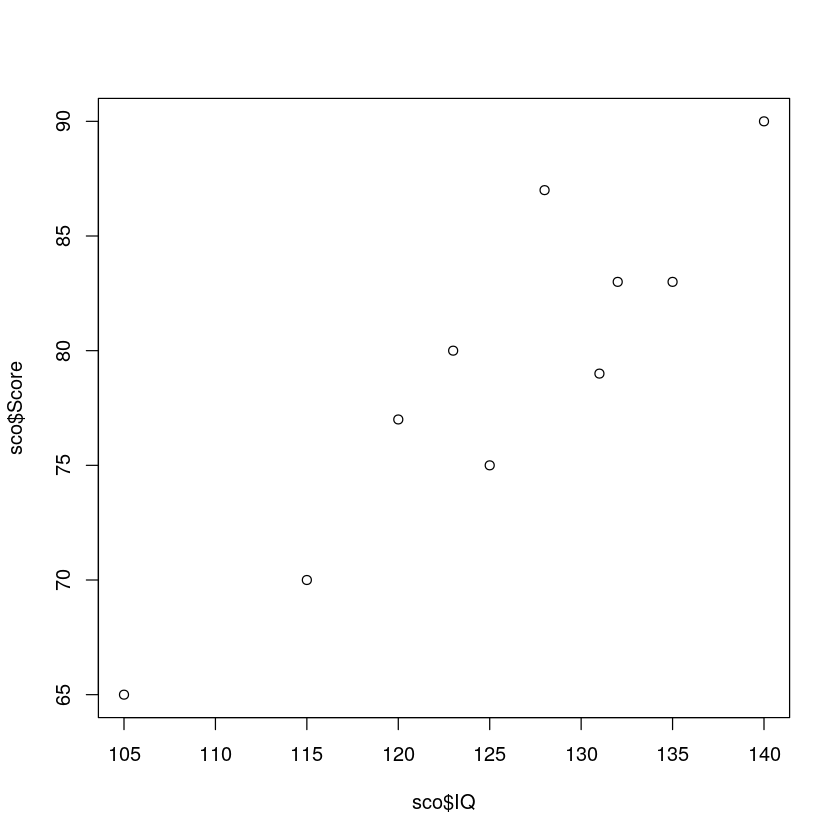

In [40]:
plot(sco$Score ~ sco$IQ) 

In [41]:
scoReg <- lm(sco$Score ~ sco$IQ) 
scoReg


Call:
lm(formula = sco$Score ~ sco$IQ)

Coefficients:
(Intercept)       sco$IQ  
    -5.2918       0.6714  


In [42]:
summary(scoReg)


Call:
lm(formula = sco$Score ~ sco$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
sco$IQ        0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


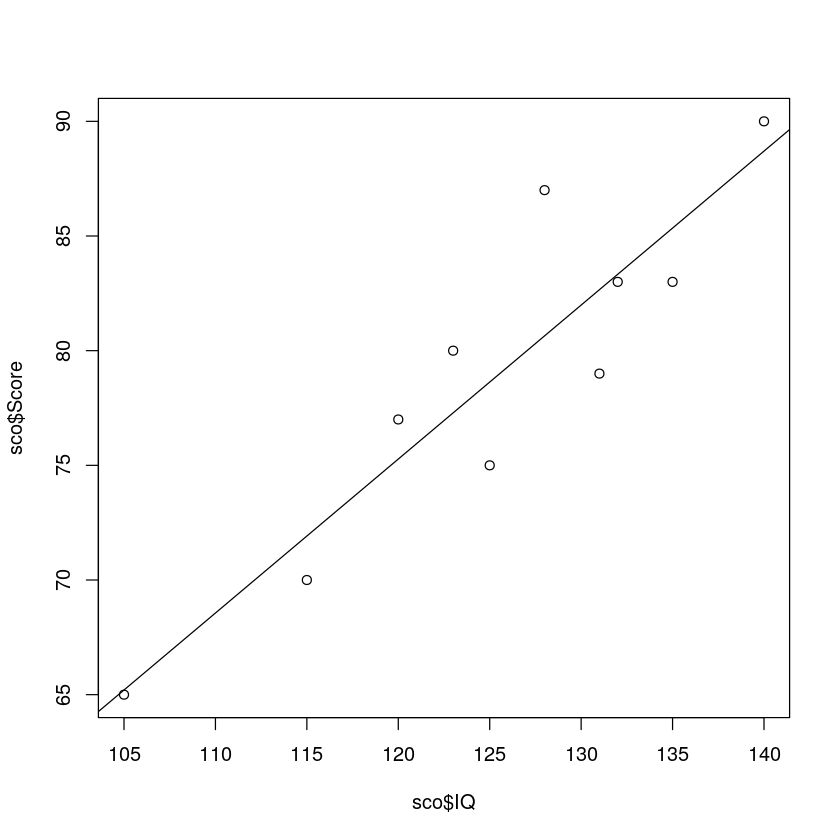

In [43]:
plot(sco$Score ~ sco$IQ)
abline(scoReg)

    * Result
    Score = -5.2918 + (0.6714 * IQ)  
    p-value: 0.000254  
    Accuracy: 80.7%  

## Multiple Regression

### with all variables

In [44]:
multiReg <- lm(Score ~ ., data = sco[-1])
multiReg


Call:
lm(formula = Score ~ ., data = sco[-1])

Coefficients:
      (Intercept)                 IQ  PrivateInstitutes           Gameplay  
          23.2992             0.4684             0.7179            -0.8390  
               TV  
          -1.3854  


In [45]:
summary(multiReg)


Call:
lm(formula = Score ~ ., data = sco[-1])

Residuals:
      1       2       3       4       5       6       7       8       9      10 
 0.5248 -0.8968  2.3139  0.3157  1.4139 -0.8445  0.4566 -2.8905  0.8711 -1.2642 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)       23.29923   12.33405   1.889  0.11751   
IQ                 0.46842    0.08953   5.232  0.00338 **
PrivateInstitutes  0.71790    1.07656   0.667  0.53440   
Gameplay          -0.83895    0.46493  -1.804  0.13100   
TV                -1.38541    0.89982  -1.540  0.18427   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.008 on 5 degrees of freedom
Multiple R-squared:  0.9608,	Adjusted R-squared:  0.9295 
F-statistic: 30.67 on 4 and 5 DF,  p-value: 0.001033


    : Only IQ shows the statistical significance when we run multiple regression with all variables. In the meantime, the prediction accuracy is 93.0% where p-value of 0.001033, which is 12.3 pts higher than the rate of simple linear regression model.

### Implement a regression model by AIC(Akaike Criterion) in a Stepwise Algorithm

In [46]:
multiReg <- lm(Score ~ ., data = sco[-1])
multiReg


Call:
lm(formula = Score ~ ., data = sco[-1])

Coefficients:
      (Intercept)                 IQ  PrivateInstitutes           Gameplay  
          23.2992             0.4684             0.7179            -0.8390  
               TV  
          -1.3854  


In [47]:
summary(multiReg)


Call:
lm(formula = Score ~ ., data = sco[-1])

Residuals:
      1       2       3       4       5       6       7       8       9      10 
 0.5248 -0.8968  2.3139  0.3157  1.4139 -0.8445  0.4566 -2.8905  0.8711 -1.2642 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)       23.29923   12.33405   1.889  0.11751   
IQ                 0.46842    0.08953   5.232  0.00338 **
PrivateInstitutes  0.71790    1.07656   0.667  0.53440   
Gameplay          -0.83895    0.46493  -1.804  0.13100   
TV                -1.38541    0.89982  -1.540  0.18427   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.008 on 5 degrees of freedom
Multiple R-squared:  0.9608,	Adjusted R-squared:  0.9295 
F-statistic: 30.67 on 4 and 5 DF,  p-value: 0.001033


In [48]:
multiRegStep <- step(multiReg, direction = "backward")

Start:  AIC=17.01
Score ~ IQ + PrivateInstitutes + Gameplay + TV

                    Df Sum of Sq     RSS    AIC
- PrivateInstitutes  1     1.794  21.960 15.866
<none>                            20.166 17.014
- TV                 1     9.561  29.727 18.895
- Gameplay           1    13.133  33.299 20.029
- IQ                 1   110.409 130.575 33.694

Step:  AIC=15.87
Score ~ IQ + Gameplay + TV

           Df Sum of Sq     RSS    AIC
<none>                   21.960 15.866
- Gameplay  1    15.930  37.890 19.321
- TV        1    35.387  57.347 23.465
- IQ        1   113.775 135.735 32.081


In [49]:
multiRegStep


Call:
lm(formula = Score ~ IQ + Gameplay + TV, data = sco[-1])

Coefficients:
(Intercept)           IQ     Gameplay           TV  
    25.0474       0.4737      -0.9037      -1.8231  


In [50]:
summary(multiRegStep)


Call:
lm(formula = Score ~ IQ + Gameplay + TV, data = sco[-1])

Residuals:
     Min       1Q   Median       3Q      Max 
-3.14632 -0.76151 -0.04647  1.05986  2.40479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 25.04740   11.48097   2.182  0.07190 . 
IQ           0.47367    0.08495   5.576  0.00141 **
Gameplay    -0.90366    0.43314  -2.086  0.08202 . 
TV          -1.82312    0.58631  -3.109  0.02086 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.913 on 6 degrees of freedom
Multiple R-squared:  0.9574,	Adjusted R-squared:  0.936 
F-statistic:  44.9 on 3 and 6 DF,  p-value: 0.0001669


    : From AIC in a Stepwise Algorithm, the model with the highest accuracy shows 93.6% where p-value of 0.0001669.  

    Score = 25.0474 + (0.4737 * IQ) + (-0.9037 * Gameplay) + (-1.8231 * TV)
    
    In this model, all variables used in the formula are statistically significant.